In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

1. Create a Jupyter notebook and name it <firstname_gourds>. For example, John Smith's notebook would be named john_gourds.ipynb

okay done. easiest question 1/10 complete.

2. Read in the gourds data into a DataFrame named gourds and look at the top 5 rows.

In [5]:
gourds = pd.read_csv('gourds.csv')
type_name = pd.read_csv('type_name.csv')

In [6]:
gourds.head(5)

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk
0,2013,F,154.5 lb,1.0,"Ellenbecker, Todd & Sequoia",Gleason,Wisconsin,United States,Nekoosa Giant Pumpkin Fest,209 Werner,Self,184.0,129.0,NaN,154.5
1,2013,F,146.5 lb,2.0,"Razo, Steve",New Middletown,Ohio,United States,Ohio Valley Giant Pumpkin Growers Weigh-off,150.5 Snyder,NaN,194.0,151.0,NaN,146.5
2,2013,F,145.0 lb,3.0,"Ellenbecker, Todd & Sequoia",Glenson,Wisconsin,United States,Mishicot Pumpkin Fest,209 Werner,103 Mackinnon,177.0,115.0,NaN,145.0
3,2013,F,140.8 lb,4.0,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,109 Martin '12,209 Werner '12,194.0,151.0,NaN,140.8
4,2013,F,139.0 lb,5.5,"Barlow, John",NaN,Wisconsin,United States,Stillwater Harvestfest,130.5 McKinnon,open,0.0,0.0,NaN,139.0


In [328]:
type_name

,type_id,type_name
0,F,Field Pumpkin
1,P,Giant Pumpkin
2,S,Giant Squash
3,W,Giant Watermelon
4,T,Tomato
5,L,Long Gourd


3. Which country shows up the most frequently in the dataset? Create a visualization (your choice) to show the frequency of appearances for the top 5 countries in terms of number of appearances.

In [8]:
gourds.info()
gourds.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28011 entries, 0 to 28010
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               28011 non-null  int64  
 1   type_id            28011 non-null  object 
 2   weight             28011 non-null  object 
 3   place              28011 non-null  float64
 4   grower_name        28011 non-null  object 
 5   city               25232 non-null  object 
 6   state_prov         28011 non-null  object 
 7   country            28011 non-null  object 
 8   gpc_site           28011 non-null  object 
 9   seed_mother        19468 non-null  object 
 10  pollinator_father  17704 non-null  object 
 11  ott                24854 non-null  float64
 12  est_weight         24854 non-null  float64
 13  variety            715 non-null    object 
 14  weight_bk          28011 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 3.2+ MB


year                    9
type_id                 6
weight               7881
place                3379
grower_name          7928
city                 3164
state_prov            134
country                21
gpc_site              166
seed_mother          9940
pollinator_father    4482
ott                   448
est_weight           1614
variety                77
weight_bk            7491
dtype: int64

In [9]:
top5 = gourds['country'].value_counts().head(5)
top5

country
United States    17070
Canada            4522
Germany           2175
Italy              846
Austria            602
Name: count, dtype: int64

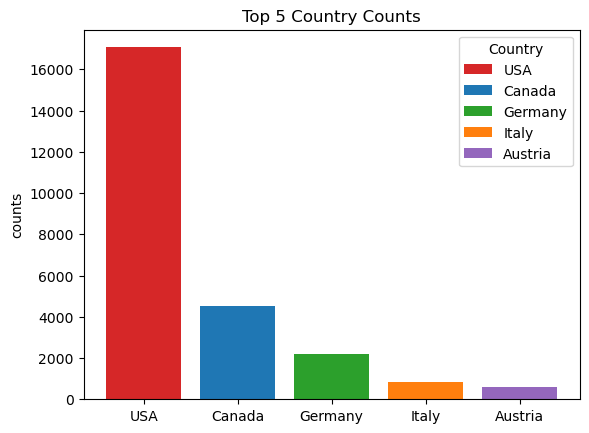

In [10]:
fig, ax = plt.subplots()

country = ['USA', 'Canada', 'Germany', 'Italy', 'Austria']
counts = [17070, 4522, 2175, 846, 602]
bar_labels = ['USA', 'Canada', 'Germany', 'Italy', 'Austria']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']

ax.bar(country, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('counts')
ax.set_title('Top 5 Country Counts')
ax.legend(title='Country')

plt.show()

4. The weight column currently contains a unit ("in" for Long Gourds and "lb" for every other type). Remove the unit from this so that you just have the numeric value and save the result back to the weight column. After doing this, sort the values on the weight column. You should find that the heaviest gourd in the dataset weighs 2702.9 lb. If you cannot find a solution for this question, you can use the weight_bk to answer the questions below that rely on it.

pd.reset_option('display.max_rows')

pd.set_option('display.max_rows', 500)

In [60]:
gourds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28011 entries, 0 to 28010
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               28011 non-null  int64  
 1   type_id            28011 non-null  object 
 2   weight             28011 non-null  object 
 3   place              28011 non-null  float64
 4   grower_name        28011 non-null  object 
 5   city               25232 non-null  object 
 6   state_prov         28011 non-null  object 
 7   country            28011 non-null  object 
 8   gpc_site           28011 non-null  object 
 9   seed_mother        19468 non-null  object 
 10  pollinator_father  17704 non-null  object 
 11  ott                24854 non-null  float64
 12  est_weight         24854 non-null  float64
 13  variety            715 non-null    object 
 14  weight_bk          28011 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 3.2+ MB


In [320]:
gourds['weight'] = gourds['weight'].astype(str).str.replace(r'[^0-9.]', '', regex=True).str.strip()
gourds['weight'] = pd.to_numeric(gourds['weight'], errors='coerce')
heaviest_gourd = gourds.sort_values(by='weight', ascending=False).reset_index(drop=True)
heaviest_gourd

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk
0,2021,P,2702.90,1.0,"Cutrupi, Stefano",Radda in Chianti,Tuscany,Italy,Campionato dello Zuccone,1885.5 Werner,Self,514.0,2553.0,NaN,2702.90
1,2016,P,2624.60,1.0,"Willemijns, Mathias",Deurle,East Flanders,Belgium,Europameisterschaft im Kurbiswiegen,2145 McMullen,1872 Willemijns,496.0,2175.0,NaN,2624.60
2,2020,P,2593.70,1.0,"Paton, Ian & Stuart",Everton nr. Lymington,England,United Kingdom,Royal Victoria Country Park,"1875 MENDI ""B""",2005 HAIST,502.0,2431.0,NaN,2593.70
3,2020,P,2551.90,2.0,"Mendi, Ruben",VALTIERRA,Navarre,Spain,Concurso Calabazas Gigantes de Valtierra,2183.7 Mendi 2019,self,485.0,2255.0,NaN,2551.90
4,2018,P,2528.00,1.0,"Geddes, Steve",Boscawen,New Hampshire,United States,Deerfield Fair,1911 Urena,1803 Gadberry,490.0,2307.0,NaN,2528.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28006,2021,T,0.21,370.0,"Ritter, Leif",Aurora,Colorado,United States,Early Tomatoes,9.44 La Rue,self,NaN,NaN,Domingo,0.21
28007,2013,P,0.15,1681.0,"Llyod, Sue",Woodstock,Connecticut,United States,Woodstock Fair,NaN,NaN,0.0,0.0,NaN,0.15
28008,2018,T,0.14,366.0,"Lindley, Jeremy",Wynne,Arkansas,United States,Operation Pumpkin,NaN,NaN,NaN,NaN,NaN,0.14
28009,2019,W,0.10,289.5,"May, Nico",NaN,Saxony,Germany,Saechsische Meisterschaft im Kurbiswiegen,NaN,NaN,0.0,227.0,NaN,0.10


5. Create a line plot showing the trend in the heaviest gourd by year. What do you notice?

In [131]:
max_by_year = gourds.groupby('year')['weight'].max().reset_index()
max_by_year

,year,weight
0,2013,2032.0
1,2014,2323.7
2,2015,2230.5
3,2016,2624.6
4,2017,2363.0
5,2018,2528.0
6,2019,2517.0
7,2020,2593.7
8,2021,2702.9


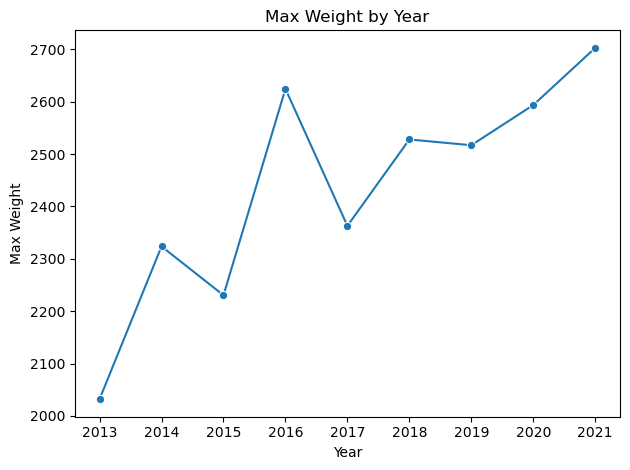

In [326]:
sns.lineplot(data=max_by_year, x='year', y='weight', marker='o')
plt.title('Max Weight by Year')
plt.xlabel('Year')
plt.ylabel('Max Weight')
plt.grid(False)
plt.tight_layout()
plt.show()

6. Read the type_name.csv dataset into a new DataFrame named type_name. Merge this with gourds to add on type_name column. Which type of gourd is heaviest on average? Create a visualization showing the distribution of gourd weights by type.

In [159]:
merged_df = pd.merge(gourds, type_name, on='type_id')

In [165]:
heaviest_gourd = merged_df.groupby('type_name')['weight'].mean().reset_index()
heaviest_gourd

,type_name,weight
0,Field Pumpkin,79.456309
1,Giant Pumpkin,776.033885
2,Giant Squash,527.298348
3,Giant Watermelon,127.149110
4,Long Gourd,94.567945
5,Tomato,3.176921


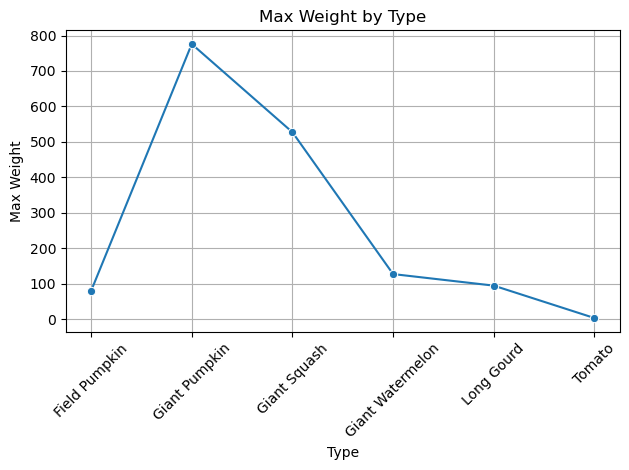

In [179]:
sns.lineplot(data=heaviest_gourd, x='type_name', y='weight', marker='o')
plt.xticks(rotation=45)
plt.title('Max Weight by Type')
plt.xlabel('Type')
plt.ylabel('Max Weight')
plt.grid(True)
plt.tight_layout()
plt.show()

8. Create a new column weight_error that contains the amount by which the estimated weight exceeded the actual weight. What is the worst overestimate of a gourd weight? What percentage of gourd weights are overestimated?

In [190]:
merged_df["weight_error"] = merged_df["est_weight"]-merged_df["weight"]
merged_df['weight_error'] = merged_df['weight_error'] * (merged_df['weight_error'] > 0)

In [196]:
merged_df.weight_error.sort_values(ascending=False)

13882    10717.0
1829      8399.2
16871     1726.5
8202      1637.0
7346      1533.0
          ...   
28003        NaN
28004        NaN
28005        NaN
28006        NaN
28008        NaN
Name: weight_error, Length: 28011, dtype: float64

In [218]:
weight_error = merged_df[merged_df['weight_error'] > 0]['weight_error'].value_counts()
weight_error
len(merged_df['weight'])

28011

In [248]:
ttl_weighted = len(merged_df['weight'])
ttl_error = len(weight_error)
pct_error = ((ttl_error) / (ttl_weighted)*100)
pct_error

5.972653600371283

9. Some growers compete across multiple types of gourd. Which grower has top 10 finishes across the largest number of types of gourds? What is this grower's best finish that shows up in the dataset?

In [269]:
top10 = merged_df[merged_df['place'] <= 10]
group_top10 = top10.groupby(['grower_name', 'type_name']).size().reset_index(name='top10_count')

In [281]:
top_grower = group_top10.groupby('grower_name')['top10_count'].count().reset_index()
top_grower = grower_top_gourd_types.sort_values(by='top10_count', ascending=False)

In [283]:
top_grower = grower_top_gourd_types.iloc[0]
top_grower

grower_name    Martin, Margaret & Glen
top10_count                          4
Name: 130, dtype: object

10. The seed_mother and pollinator_father give information on the parents for each gourd.
a. How many gourds appear in the seed_mother column at least 100 times?
b. How many gourds appear in the pollinator_father column at least 100 times?
c. How many gourds have at least 100 offspring that have appeared in the GPC Weighoff? That is, how many gourds appear at least 100 times between the seed_mother and pollinator_father columns combined? Hint: One way you could do this is to create two value_counts Series on the seed_mother and pollinator_father columns and merge them.

In [304]:
seed_mother_counts = merged_df['seed_mother'].value_counts()
freq_seed_mothers = seed_mother_counts[seed_mother_counts >= 100].index
seed_mother_100 = merged_df[merged_df['seed_mother'].isin(freq_seed_mothers)]
seed_mother_100

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk,type_name,weight_error
1,2016,P,2624.60,1.0,"Willemijns, Mathias",Deurle,East Flanders,Belgium,Europameisterschaft im Kurbiswiegen,2145 McMullen,1872 Willemijns,496.0,2175.0,NaN,2624.60,Giant Pumpkin,-0.0
17,2014,P,2323.70,1.0,"Meier, Beni",Pfungen,Other,Switzerland,Europameisterschaft im Kurbiswiegen,2009 Wallace,2328 Meier DMG,479.0,2035.0,NaN,2323.70,Giant Pumpkin,-0.0
26,2016,P,2261.00,2.0,"Wallace, Dick",Greene,Rhode Island,United States,SNGPG Frerichs Farm Weigh-off,2009 Wallace,1790 Wallace,464.0,1907.0,NaN,2261.00,Giant Pumpkin,-0.0
30,2015,P,2230.50,1.0,"Wallace, Ron",Greene,Rhode Island,United States,SNGPG Frerichs Farm Weigh-off,2009 Wallace,1916 Barron,467.0,1929.0,NaN,2230.50,Giant Pumpkin,-0.0
46,2018,P,2166.00,7.0,"Cutrupi, Stefano",Radda in Chianti,Tuscany,Italy,Campionato dello Zuccone,2145 McMullen,Self,473.0,2134.0,NaN,2166.00,Giant Pumpkin,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27921,2016,T,0.94,316.0,"O'Brien, Wayne",Cayuga,Indiana,United States,Fair Oaks Farm Cowtoberfest,Unknown,Open,NaN,NaN,NaN,0.94,Tomato,NaN
27922,2019,T,0.92,441.0,"Cohen, Ellann",Hillsboro,Oregon,United States,Terminator,Unknown,NaN,NaN,NaN,NaN,0.92,Tomato,NaN
27925,2016,T,0.91,318.0,"O'Brien, Waylen",Cayuga,Indiana,United States,Fair Oaks Farm Cowtoberfest,Unknown,Open,NaN,NaN,NaN,0.91,Tomato,NaN
27944,2015,T,0.80,309.5,"Kllinker, Kelly & Stephanie",Woodburn,Indiana,United States,Indiana State Fair Giant Pumpkin Weigh-off,Unknown,Open,NaN,NaN,NaN,0.80,Tomato,NaN


In [312]:
pollinator_father_counts = merged_df['pollinator_father'].value_counts()
freq_pollinator_father = pollinator_father_counts[pollinator_father_counts >= 100].index
pollinator_father_100 = merged_df[merged_df['seed_mother'].isin(freq_pollinator_father)]
len(pollinator_father_100)

820

In [318]:
found_in_both = merged_df[(merged_df['seed_mother'].isin(freq_seed_mothers)) & (merged_df['pollinator_father'].isin(freq_pollinator_father))]
len(found_in_both)

462